<a href="https://colab.research.google.com/github/TranThanh159/Image_Effects/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_People_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from pylab import imshow
import numpy as np
import cv2
import torch
import albumentations as albu

In [2]:
!pip install iglovikov_helper_functions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jpeg4py: filename=jpeg4py-0.1.4-py3-none-any.whl size=8441 sha256=f90081cd23380649939ccc9898ec790ab4fd1622de926116b49984b5554a2e2b
  Stored in directory: /root/.cache/pip/wheels/86/c3/0f/348e6cadb3a27435e833d21d91707d653fb159d69f2a867a36
Successfully built jpeg4py


In [3]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

In [4]:
!pip install people_segmentation  > /dev/null

In [5]:
from people_segmentation.pre_trained_models import create_model

In [6]:
def getPeopleSegmentation(model, image):
  transform = albu.Compose([albu.Normalize(p=1)], p=1)
  padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

  x = transform(image=padded_image)["image"]
  x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

  with torch.no_grad():
    prediction = model(x)[0][0]

  mask = (prediction > 0).cpu().numpy().astype(np.uint8)
  mask = unpad(mask, pads)
  return mask


In [7]:
model = create_model("Unet_2020-07-20")
model.eval();

Downloading: "https://github.com/ternaus/people_segmentation/releases/download/0.0.1/2020-09-23a.zip" to /root/.cache/torch/hub/checkpoints/2020-09-23a.zip
100%|██████████| 47.0M/47.0M [00:00<00:00, 130MB/s]
/usr/local/lib/python3.10/dist-packages/torch/hub.py:665: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


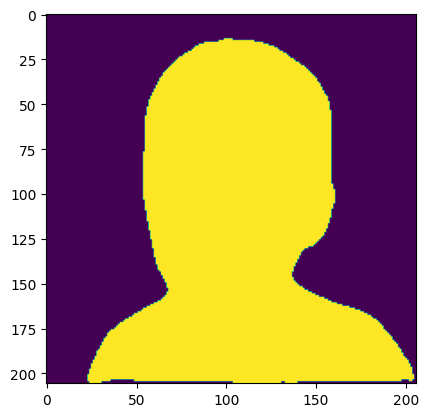

In [14]:
image = load_rgb("/content/248335225_913786342901780_1993611965997624340_n.jpg")
mask = getPeopleSegmentation(model, image)

imshow(mask)

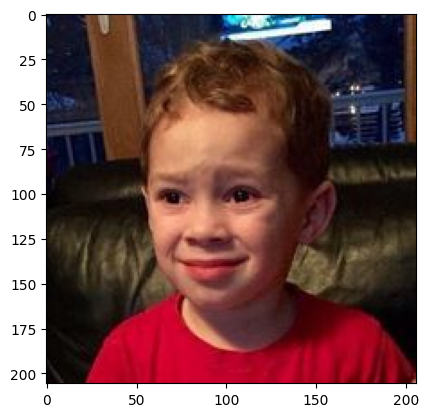

In [15]:
imshow(image)

In [10]:
mask.shape

(316, 474)

In [11]:
mask[300][250]

1

In [12]:
image.shape

(316, 474, 3)